In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import date
import datetime
import re

# 1. Exploration des données

In [98]:
# on commence par charger les labels
h1_labels = pd.read_table('data/house1_labels.txt', header=None, names=['label'])
h1_labels['label'] = h1_labels['label'].str.extract(r'[0-9]+ (.*)')
h1_labels['label'] = h1_labels['label'].str.replace(re.compile(r'( \(.*\))'), '')

# on définit des groupes, sans les 'L1' / 'L2'
h1_labels['group'] = h1_labels['label'].str.extract(r'(.*) L[0-9]').apply(lambda x: x.fillna(h1_labels['label']))
h1_labels['id'] = (h1_labels.index + 1)

# on définit les id
h1_labels['id'] = h1_labels['id'].apply(lambda x: 'sub'+str(x))

# on définit les équipements qui conditionnent l'activité
lables_map = {'Kitchen Wall Oven': 1,
'Kitchen Counter Plugs': 1,
'Upstairs Bedroom AFCI Arc-Fault Plugs': 1,
'Clothes Dryer': 1,
'Upstairs Bedroom': 1,
'Kitchen Fridge': 0,
'Clothes Washer': 1,
'Kitchen Dishwasher': 1,
'Furnace & Hot Water Unit': 0,
'Basement Plugs & Lights': 1,
'Heat Pump': 0,
'Garage Sub-Panel': 1,
'Upstairs Plugs & Lights': 1,
'Basement Blue Plugs': 1,
'Bathrooms': 1,
'Rental Suite Sub-Panel': 1,
'Misc. Plugs': 1,
'Home Office': 1}

h1_labels['activity'] = h1_labels['group'].map(lables_map)

h1_labels

,label,group,id,activity
0,Kitchen Wall Oven L1,Kitchen Wall Oven,sub1,1
1,Kitchen Wall Oven L2,Kitchen Wall Oven,sub2,1
2,Kitchen Counter Plugs L1,Kitchen Counter Plugs,sub3,1
3,Kitchen Counter Plugs L2,Kitchen Counter Plugs,sub4,1
4,Clothes Dryer L1,Clothes Dryer,sub5,1
5,Clothes Dryer L2,Clothes Dryer,sub6,1
6,Upstairs Bedroom AFCI Arc-Fault Plugs,Upstairs Bedroom AFCI Arc-Fault Plugs,sub7,1
7,Kitchen Fridge,Kitchen Fridge,sub8,0
8,Clothes Washer,Clothes Washer,sub9,1
9,Kitchen Dishwasher,Kitchen Dishwasher,sub10,1


In [200]:
house1_power_blk1 = pd.read_csv('data/house1_power_blk2.csv')
house1_power_blk1['datetime'] = pd.to_datetime(house1_power_blk1['unix_ts'], unit='s')
#house1_power_blk1['datetime'] = house1_power_blk1['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Vancouver')
house1_power_blk1['datetime'] = house1_power_blk1['datetime'] - pd.Timedelta("8 hours")

house1_power_blk1 = house1_power_blk1.set_index(house1_power_blk1['datetime'])
house1_power_blk1 = house1_power_blk1.drop(columns=['unix_ts', 'datetime'])

# id_label = {id: label for label, id in h1_labels.values}
# house1_power_blk1 = house1_power_blk1.rename(columns=id_label)
for group in h1_labels['group'].unique():
    sub_id = h1_labels.loc[h1_labels['group'] == group, 'id'].values
    house1_power_blk1[group] = house1_power_blk1[sub_id].sum(axis=1)
    house1_power_blk1 = house1_power_blk1.drop(columns=sub_id)

house1_power_blk1.head()

,ihd,mains,Kitchen Wall Oven,Kitchen Counter Plugs,Clothes Dryer,Upstairs Bedroom AFCI Arc-Fault Plugs,Kitchen Fridge,Clothes Washer,Kitchen Dishwasher,Furnace & Hot Water Unit,Basement Plugs & Lights,Heat Pump,Garage Sub-Panel,Upstairs Plugs & Lights,Basement Blue Plugs,Bathrooms,Rental Suite Sub-Panel,Misc. Plugs,Home Office
datetime,,,,,,,,,,,,,,,,,,,
2016-03-06 00:00:00,NaN,473.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,37.0,0.0,9.0,20.0,3.0,46.0,0.0,78.0
2016-03-06 00:00:01,NaN,474.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,161.0,112.0,37.0,0.0,9.0,20.0,2.0,46.0,0.0,78.0
2016-03-06 00:00:02,NaN,476.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,162.0,112.0,38.0,0.0,9.0,20.0,2.0,47.0,0.0,78.0
2016-03-06 00:00:03,NaN,476.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,36.0,0.0,9.0,23.0,2.0,47.0,0.0,78.0
2016-03-06 00:00:04,NaN,475.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,38.0,0.0,9.0,21.0,2.0,46.0,0.0,78.0


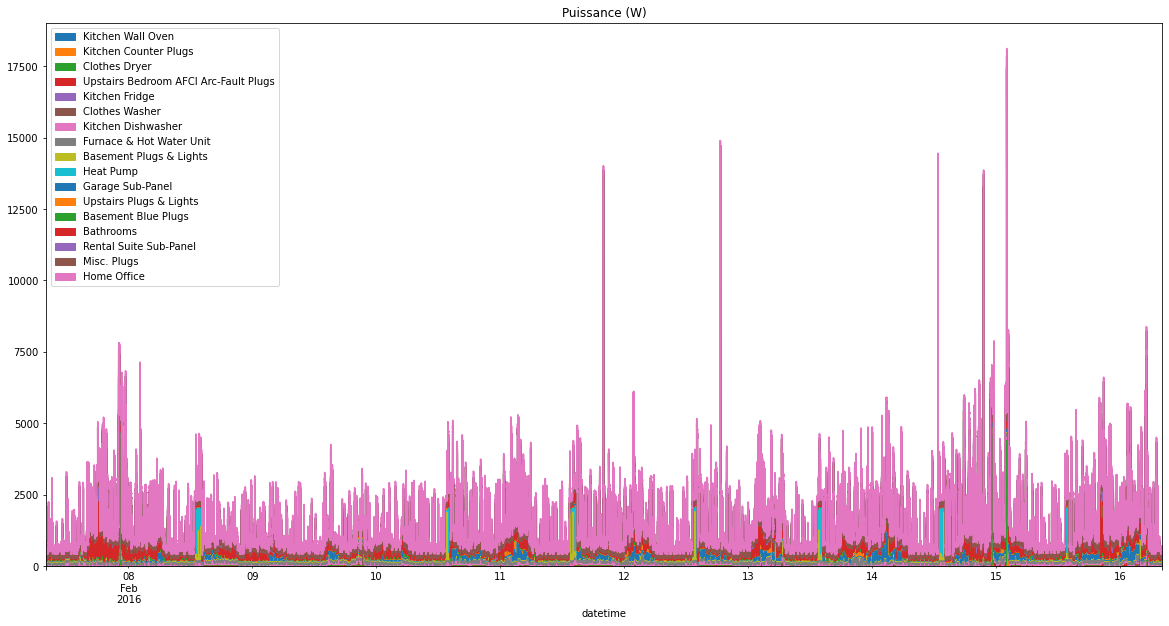

In [4]:
house1_power_blk1[h1_labels['group'].unique()].plot.area(figsize=(20,10), title='Puissance (W)');

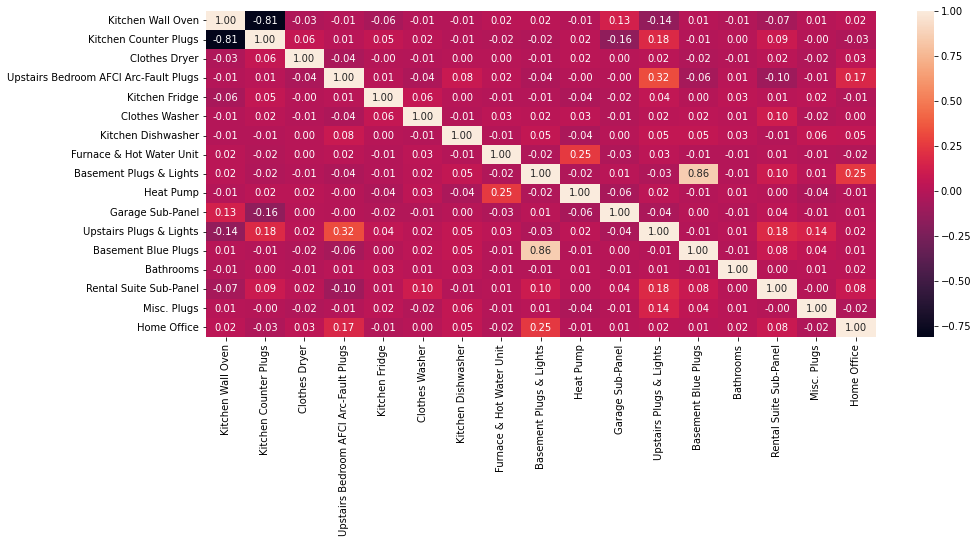

In [182]:
plt.figure(figsize=(15,6))
sns.heatmap(house1_power_blk1[h1_labels['group'].unique()].corr(), annot=True, fmt='.2f');

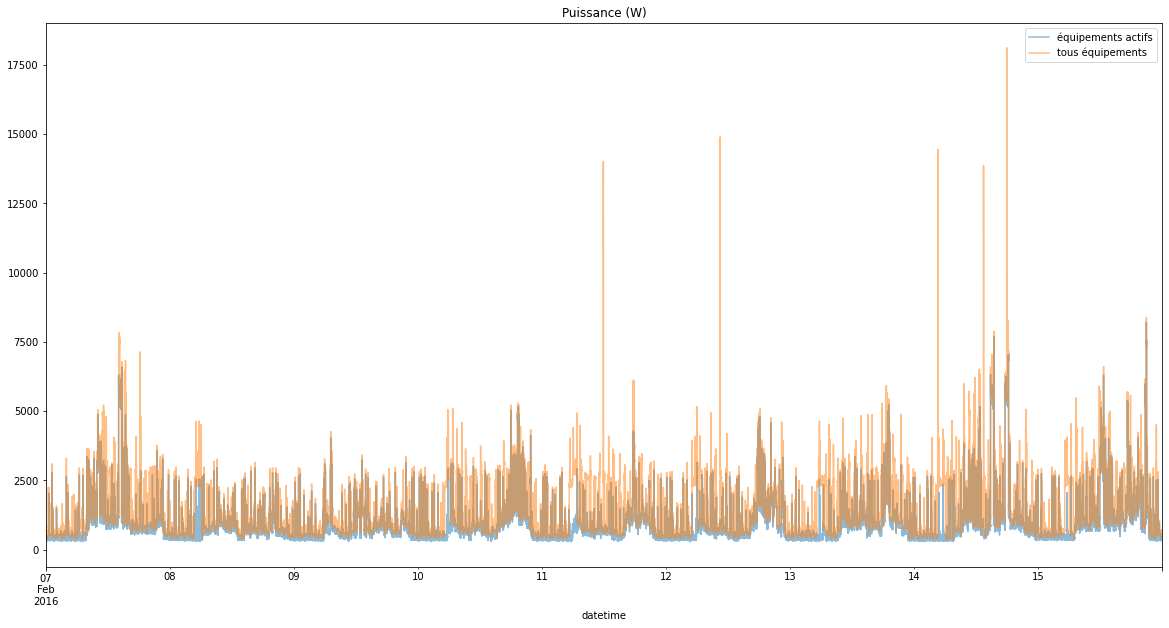

In [183]:
labels_active = h1_labels.loc[h1_labels['activity'] > 0, 'group'].unique()
ax = house1_power_blk1[labels_active].sum(axis=1).plot(figsize=(20,10), title='Puissance (W)', label='équipements actifs', alpha=0.5);
house1_power_blk1['mains'].plot(figsize=(20,10), title='Puissance (W)', label='tous équipements', alpha=0.5, ax=ax);
ax.legend();

# 2. Ajout des labels activité

Une première approche pour assigner des labels d'activité automatiquement serait d'observer la dérivée de la puissance, la lisser sur 15 min (par exemple) et assigner une activité si cette dérivée est supérieure à un certain seuil (son écarttype par exemple).

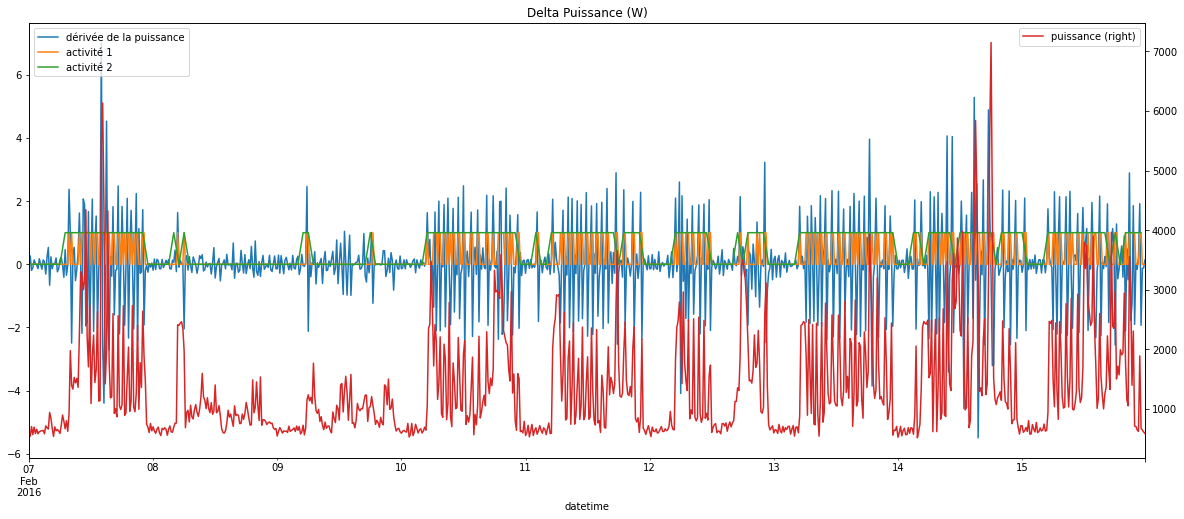

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
house1_power_blk1_diff = house1_power_blk1['mains'].diff().resample(rule='0.25H').mean().interpolate(method='linear')

house1_power_blk1_diff.plot(title='Delta Puissance (W)', label='dérivée de la puissance', ax=ax);
((house1_power_blk1_diff.abs() > house1_power_blk1_diff.std())*1).plot(label='activité 1', ax=ax);
((((house1_power_blk1_diff.abs() > house1_power_blk1_diff.std())*1).resample(rule='1H').mean() > 0.01)*1).plot(label='activité 2', ax=ax);
axr = house1_power_blk1['mains'].resample(rule='0.25H').mean().interpolate(method='linear').plot(secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

Une autre approche pourrait être de considérer qu'il y a activité si certaines puissances sont supérieures à 0 (i.e. il y a bien une activité électrique sur ces équipements).

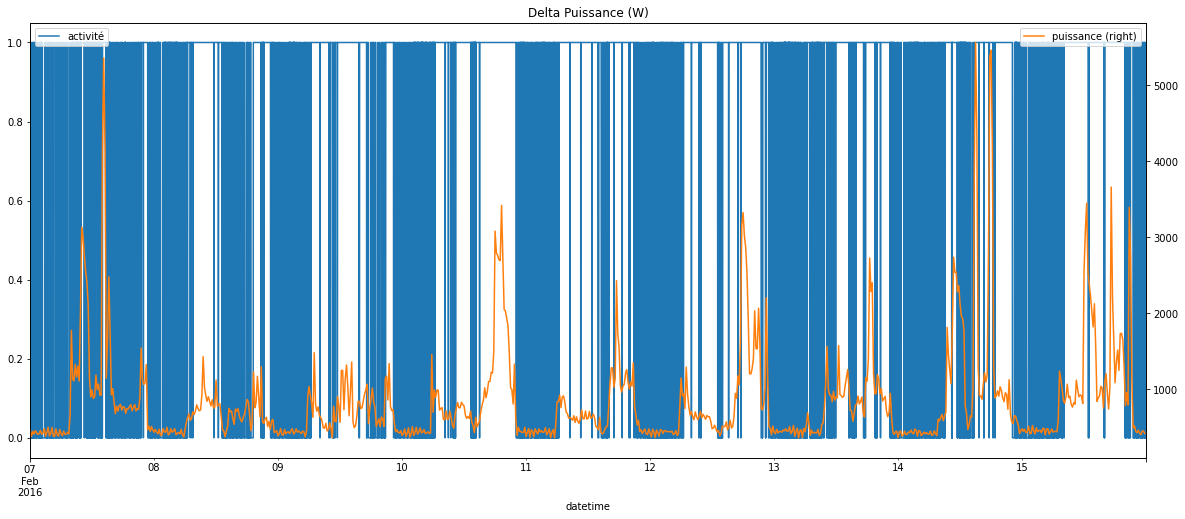

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))

labels_active = h1_labels.loc[h1_labels['activity'] > 0, 'group'].unique()
house1_power_blk1_resample = house1_power_blk1[labels_active].sum(axis=1).resample(rule='0.25H').mean().interpolate(method='linear')
tol = house1_power_blk1[labels_active].mean().abs() + house1_power_blk1[labels_active].std()

((house1_power_blk1[labels_active] > tol).any(axis=1)*1).plot(label='activité', ax=ax);
axr = house1_power_blk1_resample.plot(title='Delta Puissance (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

On se rend compte que cette approche ne fonctionne pas vraiment puisqu'on a tendance à classier tous les points comme une période d'activité. 

Une autre idée consiste dans un premier à centrer et normer les puissances correspondantes à chaque appareil correspondant à de l'activité. Si une des colonne dépasse un certain seuil (leur écarttype par exemple, qui vaut 1), on labelise le point comme de l'activité. Pour mieux pouvoir observer la courbe d'activité ainsi estimée nous allons la lisser sur 15 min. Ensuite si la moyenne glissante est supérieure à un certain seuil, on labélise comme de l'activité.

Nous allons comparer les résultats obtenus avec cette méthode et les résultats obtenus avec la méthode par dérivation appliquée au cumul de la puissance consommée sur les appareils qui correspondent à de l'activité.

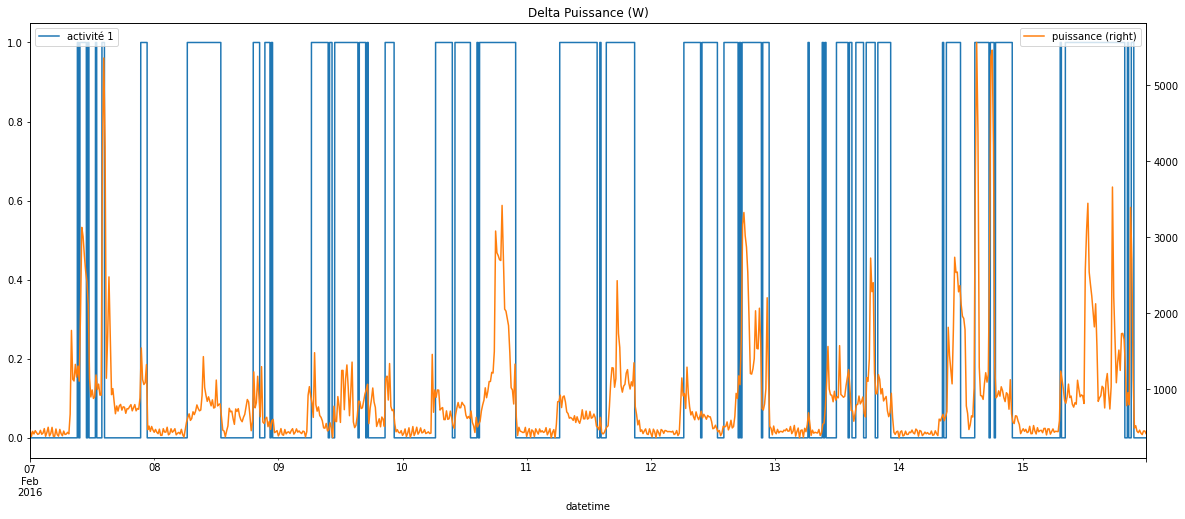

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))

labels_active = h1_labels.loc[h1_labels['activity'] > 0, 'group'].unique()
house1_power_blk1_diff = house1_power_blk1[labels_active].sum(axis=1).diff().resample(rule='0.25H').mean().interpolate(method='linear')
house1_power_blk1_resample = house1_power_blk1[labels_active].sum(axis=1).resample(rule='0.25H').mean().interpolate(method='linear')

house1_power_blk1_norm = (house1_power_blk1[labels_active] - house1_power_blk1[labels_active].mean()) / house1_power_blk1[labels_active].std()
tol = 1 #house1_power_blk1_norm.std()

#((house1_power_blk1_norm[labels_active].abs() > tol).any(axis=1)*1).plot(label='activité 1', ax=ax);
#((house1_power_blk1_norm[labels_active].abs() > tol).any(axis=1)*1).resample(rule='0.25H').mean().plot(label='activité 1', ax=ax);
((((house1_power_blk1_norm[labels_active].abs() > tol).any(axis=1)*1).resample(rule='0.25H').mean() > 0.85)*1).resample(rule='S').interpolate(method='nearest').plot(label='activité 1', ax=ax);
#((((house1_power_blk1_diff.abs() > house1_power_blk1_diff.std())*1).resample(rule='1H').mean() > 0.01)*1).plot(label='activité 2', ax=ax);
axr = house1_power_blk1_resample.plot(title='Delta Puissance (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

In [203]:
tol = house1_power_blk1[labels_active].mean().abs() + house1_power_blk1[labels_active].std()

house1_power_blk1['activity'] = ((((house1_power_blk1[labels_active] > tol).any(axis=1)*1).resample(rule='0.25H').mean() > 0.85)*1).resample(rule='S').interpolate(method='nearest')
house1_power_blk1['hour'] = house1_power_blk1.index.hour

Cette méthode semble donner de meilleurs résultats, surtout avec un seuil de 1 (= écarttype des données normalisées) puis de 0.85 sur le signal lissé.

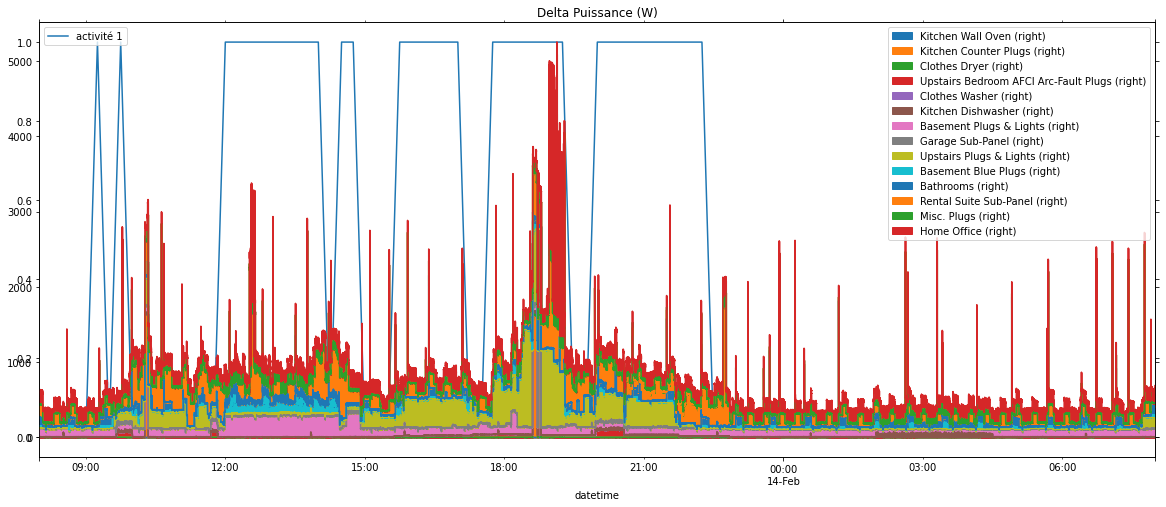

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
((((house1_power_blk1_norm[labels_active].abs() > tol).any(axis=1)*1).resample(rule='0.25H').mean() > 0.85)*1)['2016-02-13 08:00:00':'2016-02-14 08:00:00'].plot(label='activité 1', ax=ax);
#((((house1_power_blk1_diff.abs() > house1_power_blk1_diff.std())*1).resample(rule='1H').mean() > 0.01)*1).plot(label='activité 2', ax=ax);
axr = house1_power_blk1.loc['2016-02-13 08:00:00':'2016-02-14 08:00:00', labels_active].plot.area(title='Delta Puissance (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

In [201]:
house1_tstat_blk1 = pd.read_csv('data/house1_tstat_blk1.tab', sep='\t')
house1_tstat_blk1['datetime'] = pd.to_datetime(house1_tstat_blk1['Date'] + ' ' + house1_tstat_blk1['Time'])
house1_tstat_blk1 = house1_tstat_blk1.set_index('datetime')

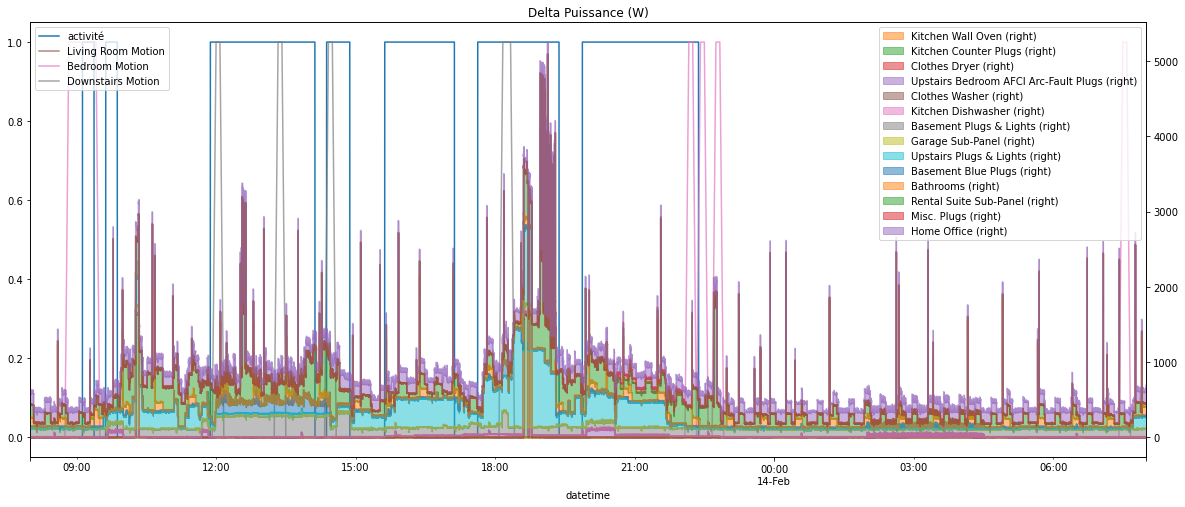

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
house1_power_blk1.loc['2016-02-13 08:00:00':'2016-02-14 08:00:00', 'activity'].plot(label='activité', ax=ax);
#((((house1_power_blk1_diff.abs() > house1_power_blk1_diff.std())*1).resample(rule='1H').mean() > 0.01)*1).plot(label='activité 2', ax=ax);
axr = house1_power_blk1.loc['2016-02-13 08:00:00':'2016-02-14 08:00:00', labels_active].plot.area(title='Delta Puissance (W)',secondary_y=True, alpha=0.5, label='puissance', ax=ax);

columns_graph = ['Living Room Motion', 'Bedroom Motion', 'Downstairs Motion']
house1_tstat_blk1.loc['2016-02-13 08:00:00':'2016-02-14 08:00:00', columns_graph].plot(label = 'motion', alpha=0.7, ax=ax);
ax.legend(loc='upper left');
axr.legend(loc='upper right');

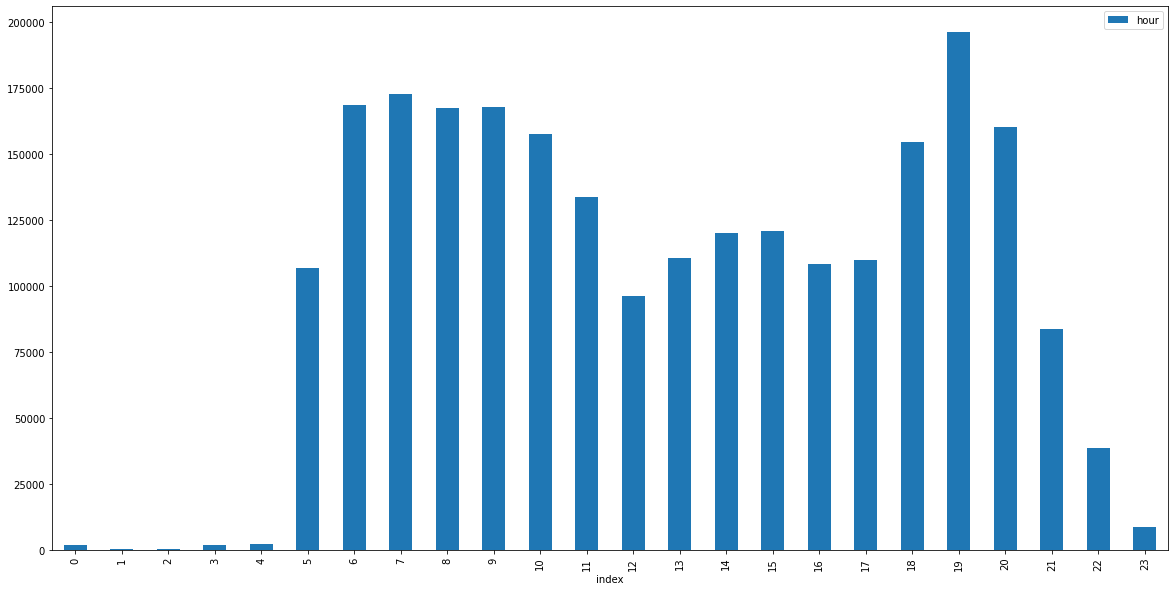

In [206]:
pd.DataFrame(house1_power_blk1.loc[house1_power_blk1['activity'] > 0, 'hour'].value_counts()).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='hour', figsize=(20,10), legend='Histogramme activité=f(heure)');